### Atividade

Instruções
- Resolver as questões abaixo. Subir o notebook em um repositório público no GitHub e enviar no [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform)
- Para resolver as questões abaixo utilizar o dataset do seaborn: 'mpg'
- Para os gráficos finais de cada questão, eles devem possuir título, rótulo dos eixos definidos e legenda (quando necessário).

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Importa dataset
mpg = sns.load_dataset('mpg')

In [35]:
# Verifica informações gerais do dataset
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### Questão 1

Verificar se a base de dados possui valores nulos. Para as linhas com valores nulos, deletar as mesmas. Ao final da questão verificar se a base de dados ficou com 392 registros e 9 colunas.

In [36]:
# Verifica a quantidade de valores nulos
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [37]:
# Deleta as linhas de valores nulos
mpg.dropna(inplace=True)

In [38]:
# Verifica que o número de linhas é 392
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#### Questão 2

Qual a quantidade de carros por origem (*origin*)? Responda utilizando um gráfico de barras e inclua os rótulos dos dados.

In [45]:
# Calcula quantos valores únicos existem na coluna origin
mpg['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [40]:
# Define o eixo x como os nomes dos países e o eixo y como a quantidade de carros por país
x_bar = mpg['origin'].value_counts().index
y_bar = mpg['origin'].value_counts().values
print(x_bar)
print(y_bar)

Index(['usa', 'japan', 'europe'], dtype='object')
[245  79  68]


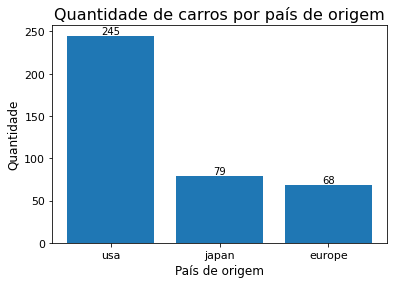

In [49]:
# Plota o gráfico de barras da quantidade de carros por país de origem
fig, ax = plt.subplots()
plt.bar(x_bar, y_bar, color='blue')

# Títulos e tamanho de fontes
plt.title('Quantidade de carros por país de origem', fontsize=16)
plt.xlabel('País de origem', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Rótulos
bars = ax.bar(x_bar, y_bar)
ax.bar_label(bars)

plt.show()

#### Questão 3

Qual a média da potência (*horsepower*) dos carros por origem?

In [54]:
# Calcula a média da potência dos carros por origem
mpg_potencia_origem = round(mpg.groupby('origin')['horsepower'].mean(), 2)
mpg_potencia_origem

origin
europe     80.56
japan      79.84
usa       119.05
Name: horsepower, dtype: float64

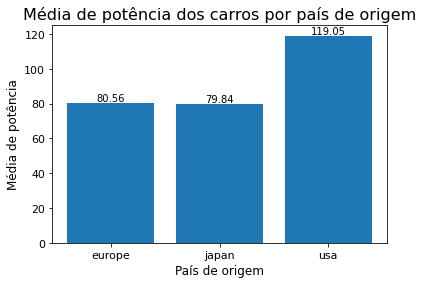

In [55]:
# Gráfico de linhas da média da potência dos carros por origem
x_bar2 = mpg_potencia_origem.index
y_bar2 = mpg_potencia_origem.values

fig, ax = plt.subplots()
plt.bar(x_bar2, y_bar2, color='red')

# Títulos e tamanho de fontes
plt.title('Média de potência dos carros por país de origem', fontsize=16)
plt.xlabel('País de origem', fontsize=12)
plt.ylabel('Média de potência', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Rótulos
bars = ax.bar(x_bar2, y_bar2)
ax.bar_label(bars)

plt.show()

#### Questão 4

Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) dos carros?

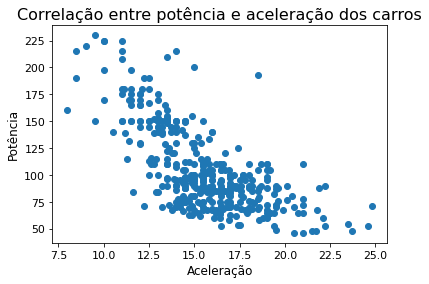

In [57]:
# Plota a correlação entre a potência e a aceleração dos carros
x_scatter = mpg['acceleration']
y_scatter = mpg['horsepower']
plt.scatter(x_scatter, y_scatter)

# Títulos e tamanho de fontes
plt.title('Correlação entre potência e aceleração dos carros', fontsize=16)
plt.xlabel('Aceleração', fontsize=12)
plt.ylabel('Potência', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

#### Questão 5

Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) dos carros, segmentando de acordo com a origem (*origin*) com cores diferentes e plotando no mesmo eixo (*axes*)?

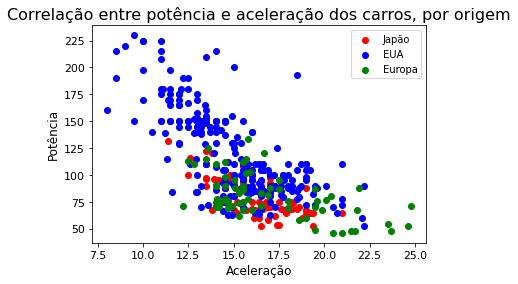

In [64]:
# Plota a correlação entre a potência e a aceleração dos carros por origem
plt.scatter(data = mpg[mpg['origin'] == 'japan'], x = 'acceleration', y = 'horsepower', c = 'red', label = 'Japão')
plt.scatter(data = mpg[mpg['origin'] == 'usa'], x = 'acceleration', y = 'horsepower', c = 'blue', label = 'EUA')
plt.scatter(data = mpg[mpg['origin'] == 'europe'], x = 'acceleration', y = 'horsepower', c = 'green', label = 'Europa')

# Títulos e tamanho de fontes
plt.title('Correlação entre potência e aceleração dos carros, por origem', fontsize=16)
plt.xlabel('Aceleração', fontsize=12)
plt.ylabel('Potência', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Adiciona a legenda
plt.legend()

plt.show()